In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
database = pd.read_excel("apriori_groceries.xlsx")
database.head(5)

,Apple,Banana,Beef,Biscuits,Bread,Butter,Carrot,Cereal,Cheese,Chicken,...,Onion,Orange,Pasta,Potato,Rice,Salt,Sugar,Tea,Tomato,Yogurt
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,1
1,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
from sklearn.datasets import make_moons

In [4]:
x , y = make_moons(n_samples=1000, noise=0.2)

In [5]:
df = {'Data 1': x[:, 0], 'Data 2': x[:, 1], 'Target': y}

In [6]:
database = pd.DataFrame(df)

In [7]:
database.head(5)

,Data 1,Data 2,Target
0,0.252677,0.516705,1
1,1.103337,0.112901,0
2,0.761285,-0.828244,1
3,1.031318,0.304196,0
4,0.742357,-0.190888,1


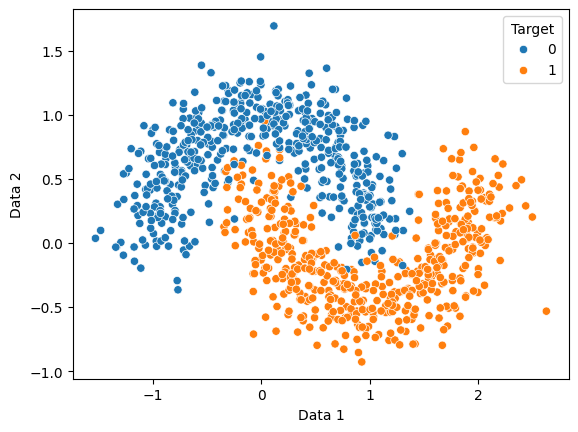

In [8]:
sns.scatterplot(x="Data 1", y="Data 2", hue="Target", data=database)
plt.show()

In [9]:
x = database.iloc[:, :-1]
y = database["Target"]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [12]:
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)
dc.score(x_test, y_test)*100, dc.score(x_train, y_train)*100

(95.5, 100.0)

In [13]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)*100, svm.score(x_train, y_train)*100

(96.0, 97.375)

In [14]:
gb = GaussianNB()
gb.fit(x_train, y_train)
gb.score(x_test, y_test)*100, gb.score(x_train, y_train)*100

(85.0, 86.875)

In [15]:
from sklearn.ensemble import VotingClassifier

In [16]:
li = [("DecisionTreeClassifier", DecisionTreeClassifier()), ("SVC", SVC()), ("GaussianNB", GaussianNB())]

In [17]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

,estimators,"[('DecisionTreeClassifier', ...), ('SVC', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [18]:
vc.score(x_test, y_test)*100, vc.score(x_train, y_train)*100

(96.0, 97.875)

In [19]:
prd = {"VotingClassifier": vc.predict(x_test), "DecisionTreeClassifier": dc.predict(x_test), "SVC": svm.predict(x_test), "GaussianNB": gb.predict(x_test)}

In [21]:
pd.DataFrame(prd)

,VotingClassifier,DecisionTreeClassifier,SVC,GaussianNB
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,0,0,0,1
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,0,0,0,0
198,0,0,0,0
